## Compute domain trustworthiness

In [5]:
import gzip,csv 
import pandas as pd

In [47]:
# Formula = trustworthiness(domain) =C(domain, real)/C(domain) -C(domain, fake)/C(fake)  
def compute_trustworthiness(num_fake, num_real, total_fake):
    return (num_real/(num_real+num_fake)) - ((num_fake)/total_fake)

In [15]:
df = pd.read_csv("../final_combined_kaggle_scraped_pruned.csv.gz", encoding = 'latin-1')

In [17]:
domain_names_set = set(df['site_url'].tolist())

In [19]:
domain_names_set, len(domain_names_set)

({'100percentfedup.com',
  '21stcenturywire.com',
  'abcnews.com.co',
  'abeldanger.net',
  'abovetopsecret.com',
  'activistpost.com',
  'addictinginfo.org',
  'adobochronicles.com',
  'ahtribune.com',
  'allnewspipeline.com',
  'americanlookout.com',
  'americasfreedomfighters.com',
  'amren.com',
  'amtvmedia.com',
  'anonews.co',
  'anonhq.com',
  'antiwar.com',
  'awdnews.com',
  'barenakedislam.com',
  'beforeitsnews.com',
  'betootaadvocate.com',
  'bigbluevision.org',
  'bignuggetnews.com',
  'bipartisanreport.com',
  'blackagendareport.com',
  'blacklistednews.com',
  'bloomberg.com',
  'breitbart.com',
  'chronicle.su',
  'clickhole.com',
  'coasttocoastam.com',
  'collective-evolution.com',
  'consciouslifenews.com',
  'conservativedailypost.com',
  'conservativetribune.com',
  'consortiumnews.com',
  'corbettreport.com',
  'countercurrents.org',
  'counterpunch.org',
  'dailysquib.co.uk',
  'dailystormer.com',
  'dailywire.com',
  'darkmoon.me',
  'davidduke.com',
  'davids

In [37]:
domain_dict = {"UNK":(0,0)}
domain_trustworthiness = {"UNK": 0.5}

In [38]:
total_fake = len(df[df['fake_category']==1])
for domain_name in domain_names_set:
    num_fake = len(df[(df['site_url']==domain_name) & (df['fake_category']==1)])
    num_real = len(df[(df['site_url']==domain_name) & (df['fake_category']==0)])
    domain_dict[domain_name] = (num_fake, num_real)
    domain_trustworthiness[domain_name] = compute_trustworthiness(num_fake, num_real, total_fake)

In [48]:
domain_trustworthiness

{'100percentfedup.com': -0.0014580529385374607,
 '21stcenturywire.com': -0.0006729475100942127,
 'UNK': 0.5,
 'abcnews.com.co': -0.00016823687752355316,
 'abeldanger.net': -0.0018506056527590848,
 'abovetopsecret.com': -0.010991475998205474,
 'activistpost.com': -0.005551816958277255,
 'addictinginfo.org': -0.0007851054284432481,
 'adobochronicles.com': -0.0009533423059668013,
 'ahtribune.com': -0.005607895917451772,
 'allnewspipeline.com': -0.00011215791834903544,
 'americanlookout.com': -0.00016823687752355316,
 'americasfreedomfighters.com': -0.00011215791834903544,
 'amren.com': -0.009365186182144459,
 'amtvmedia.com': -0.009533423059668013,
 'anonews.co': -0.00033647375504710633,
 'anonhq.com': -0.002972184836249439,
 'antiwar.com': -0.009477344100493494,
 'awdnews.com': -0.005607895917451772,
 'barenakedislam.com': -0.008019291161956035,
 'beforeitsnews.com': -0.003589053387169134,
 'betootaadvocate.com': -0.00016823687752355316,
 'bigbluevision.org': -5.607895917451772e-05,
 'bi

In [43]:
domain_trustworthiness['bloomberg.com']

1.0

In [45]:
domain_trustworthiness['awdnews.com']

-0.005607895917451772

In [46]:
domain_trustworthiness['UNK']

0.5

In [49]:
domain_trustworthiness

{'100percentfedup.com': -0.0014580529385374607,
 '21stcenturywire.com': -0.0006729475100942127,
 'UNK': 0.5,
 'abcnews.com.co': -0.00016823687752355316,
 'abeldanger.net': -0.0018506056527590848,
 'abovetopsecret.com': -0.010991475998205474,
 'activistpost.com': -0.005551816958277255,
 'addictinginfo.org': -0.0007851054284432481,
 'adobochronicles.com': -0.0009533423059668013,
 'ahtribune.com': -0.005607895917451772,
 'allnewspipeline.com': -0.00011215791834903544,
 'americanlookout.com': -0.00016823687752355316,
 'americasfreedomfighters.com': -0.00011215791834903544,
 'amren.com': -0.009365186182144459,
 'amtvmedia.com': -0.009533423059668013,
 'anonews.co': -0.00033647375504710633,
 'anonhq.com': -0.002972184836249439,
 'antiwar.com': -0.009477344100493494,
 'awdnews.com': -0.005607895917451772,
 'barenakedislam.com': -0.008019291161956035,
 'beforeitsnews.com': -0.003589053387169134,
 'betootaadvocate.com': -0.00016823687752355316,
 'bigbluevision.org': -5.607895917451772e-05,
 'bi

In [50]:
#Store domain trustworthiness as a json file
import json
with open('domain_trustworthiness.json', 'w') as fp:
    json.dump(domain_trustworthiness, fp)

## Find similar headlines for a given article headline using LDA adapted from https://www.kaggle.com/ktattan/lda-and-document-similarity

inside input_document_tokenizer
inside gen_bow
inside gen_document_distribution
inside plot_topic_distribution


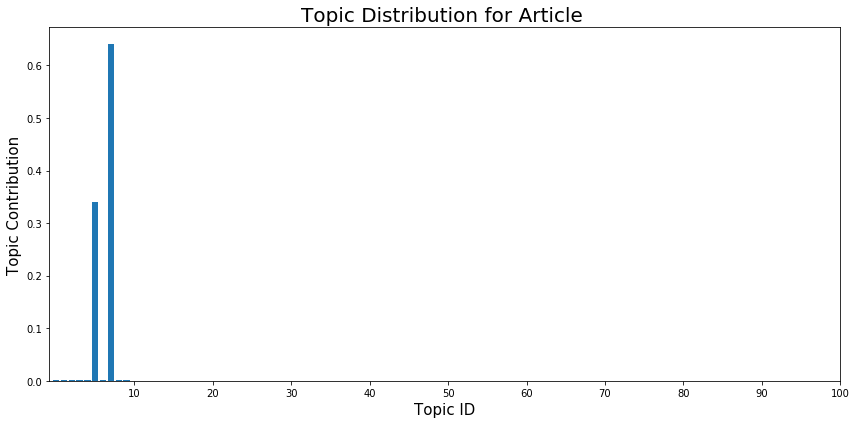

inside print_top_n_topics
(7, [(u'trump', 0.070350145285043311), (u'presid', 0.019621304355688363), (u'said', 0.017899626814417903), (u'donald', 0.014803781502862056), (u'obama', 0.014339397235246737), (u'republican', 0.01270831182975868), (u'us', 0.010926697444176094), (u'white', 0.0097849194484117569), (u'american', 0.0088283612538632306), (u'hous', 0.0068958583634122529)], '\n')
(5, [(u'peopl', 0.010875382474376735), (u'one', 0.0094113675641935846), (u'like', 0.0087943220479691879), (u'go', 0.0071668634572287114), (u'get', 0.0067435263392392848), (u'time', 0.0061266830363915651), (u'know', 0.0055721743695092453), (u'dont', 0.0055055974904148278), (u'would', 0.0052874217236862728), (u'thing', 0.004998696712917478)], '\n')
(9, [(u'said', 0.017985961188079876), (u'say', 0.014151866153126575), (u'labour', 0.012400960984112004), (u'eu', 0.011914907106505295), (u'would', 0.011147144896572862), (u'corbyn', 0.0087138370523516841), (u'uk', 0.0084835207741376338), (u'minist', 0.00719447531590

,text,title,tokenized
1115,The words “child scoop” usually call to mind i...,Hilde Lysiak: 'Just because I’m nine doesn’t m...,"[word, child, scoop, usual, call, mind, ice, c..."
4232,"Follow @bpolitics for all the latest news, and...",Scaramucci Says Bannon a 'Snag' on Trump's Whi...,"[follow, latest, news, sign, daili, balanc, po..."
7908,How the Oligarchy Has Prepared the Groundwork ...,How the Oligarchy Has Prepared the Groundwork ...,"[oligarchi, prepar, groundwork, steal, elect, ..."
8900,The United Nations in New York has backed call...,UN calls for ceasefires to ease civilians' des...,"[unit, nation, new, york, back, call, regular,..."
10721,"Silent, head bowed, shoulders hunched in an il...",'His spirit seems broken': Pistorius severely ...,"[silent, head, bow, shoulder, hunch, illfit, s..."
11532,Cayenne pepper may be the miracle first-aid sp...,Stop Bleeding in 10 Seconds With Cayenne Pepper,"[cayenn, pepper, may, miracl, firstaid, spice,..."
22082,"Follow @bpolitics for all the latest news, and...",Trump's Tweets on London Attack Denounced as �...,"[follow, latest, news, sign, daili, balanc, po..."
23511,This article was originally published on 20 Ju...,Jill Harth speaks out about alleged groping by...,"[articl, origin, publish, juli, woman, centr, ..."
23741,Report Copyright Violation Mark of the Beast @...,Mark of the Beast,"[report, copyright, violat, mark, beast, video..."
24957,Nation Puts 2016 Election Into Perspective By ...,Top Retail Anti-Theft Measures - The Onion - A...,"[nation, put, elect, perspect, remind, speci, ..."


In [29]:
article = "Trump hates Obama explored"
output_similar_documents(obj_dict,article)

## Compute final domain weighted stance + dataset specific score

In [ ]:
input_headline = "An Old Trump Tweet About Obama Yet Again Condemns Something He’s Doing Now"
input_article = "Donald Trump wants to be hailed as the “Make America Great Again” president, but on Twitter, he’s known as another four-word expression: Trump’s latest “should regret, but doesn’t regret” tweet dates back to December 2014, when he wrote, “Obama has admitted that he spends his mornings watching @espn. Then he plays golf, fundraises & grants amnesty to illegals.” We already know about his propensity for playing golf, but he’s also an avid follower of ESPN. After SportsCenter host Jemele Hill called Trump a “white supremacist who has largely surrounded himself w/ other white supremacists” and “the most ignorant, offensive president of my lifetime,” he tweet-demanded that ESPN “apologize for untruth."

similar_headlines, similar_articles, domain_names = output_similar_documents(obj_dict, input_headline)
dataset_specific_fake_score = datatset_specific_score(input_headline, input_article)
stance_scores_domains = [(domain_name, get_stance_prediction(input_headline, similar_article)) for similar_articles, domain_name in zip(similar_articles, domain_names)]
stance_specific_score = sum[domain_trustworthiness[domain_name]*stance_score for stance_score, domain_name in stance_scores_domains]
final_fake_score = 0.7* stance_specific_score + 0.3*dataset_specific_fake_score

### LDA to detect topic similarity (adapted from https://www.kaggle.com/ktattan/lda-and-document-similarity ) 

In [28]:


import pandas as pd
import numpy as np
import os
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

def load_df_raw(csvpath, colnames=['text']):
    
    """Loads df from filepath 
       and extracts the relevant columns
   for cleaning before returning df """
    print("inside load_df_raw")   
    df = pd.read_csv(csvpath, usecols = ['title','text'])
    df = df[df['text'].map(type) == str]
    df['title'].fillna(value="", inplace=True)
    df.dropna(axis=0, inplace=True, subset=['text'])
    # shuffle the data
    df = df.sample(frac=1.0)
    df.reset_index(drop=True,inplace=True)
    return df

def initial_clean(text):
    """
    Function to clean text of websites, email addresess and any punctuation
    We also lower case the text
    """
    text = re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)", " ", text)
    text = re.sub("[^a-zA-Z ]", "", text)
    text = text.lower() # lower case the text
    text = nltk.word_tokenize(text)
    return text

def remove_stop_words(text):
    stop_words = stopwords.words('english')
    return [word for word in text if word not in stop_words]


def stem_words(text):
    stemmer = PorterStemmer()
    try:
        text = [stemmer.stem(word) for word in text]
        text = [word for word in text if len(word) > 1] # make sure we have no 1 letter words
    except IndexError: # the word "oed" broke this, so needed try except
        pass
    return text

def apply_all(text):
    return stem_words(remove_stop_words(initial_clean(text)))

def save_tokenized_df(df_tokenized):
    tokenized_column_holder = df_tokenized['tokenized']
    df_token_removed = df_tokenized.drop('tokenized',axis=1)
    #clean the df
    try:
        df_token_removed['text'] = df_token_removed.text.values.astype('U')
    except:
        df_token_removed['text'] = df_token_removed.text.values
        
    try:
        df_token_removed['title'] = df_token_removed.title.values.astype('U')
    except:
        df_token_removed['title'] = df_token_removed.title.values
    df_token_removed.to_csv('lda/df_token_removed.csv')
    tokenized_nparray = np.array(tokenized_column_holder)
    np.save('lda/tokenized_nparray.npy', tokenized_nparray)

def load_tokenized_df():
    df_token_removed = pd.read_csv('lda/df_token_removed.csv',encoding='cp1252')
    tokenized_column_holder = np.load('lda/tokenized_nparray.npy')
    df_tokenized = df_token_removed
    df_tokenized['tokenized'] = tokenized_column_holder
    return df_tokenized 

def text_to_tokens(df):
    print("inside text_to_tokens")
    try:
        df['text'] = df.text.values.astype('U')
    except:
        df['text'] = df.text.values
        
    try:
        df['title'] = df.title.values.astype('U')
    except:
        df['title'] = df.title.values
    try:
        df['tokenized'] = df['text'].apply(apply_all) + df['title'].apply(apply_all)
    except KeyError as k:
        print(k,"\n")
        print("Column with name \'text\' not found")
    try:
        df.to_csv('lda/df_tokenized.csv')
    except:
        print("Unable to save the tokenized df in fn() text_to_tokens")

    save_tokenized_df(df)

    # try:
    # 	save_tokenized_df(df)
    # except:
    # 	print('unable to save the tokenized df using save_tokenized_df() fn')
    return df

def word_universe(df):
    print("word_universe")
    """Get a list of all the words in the corpus"""
    try:
        all_words = [word for item in list(df['tokenized']) for word in item]
    except KeyError as k:
        print(k,"\n")
        print("Column with name \'sent_tokenized_text\' not found")
    return all_words

def purge_words(df,all_words):
    print("inside purge_words") 
    fdist = FreqDist(all_words)
    k = 50000
    top_k_words,_ = zip(*fdist.most_common(k))
    top_k_words = set(top_k_words)
    def keep_top_k_words(text):
        return [word for word in text if word in top_k_words]
    df['tokenized'] = df['tokenized'].apply(keep_top_k_words)
    return df

def purge_articles(df):
    print("inside purge_articles") 
    # only keep articles with more than 30 tokens, otherwise too short
    df = df[df['tokenized'].map(len) >= 40]
    # make sure all tokenized items are lists
    df = df[df['tokenized'].map(type) == list]
    df.reset_index(drop=True,inplace=True)
    print("After cleaning and excluding short aticles, the dataframe now has:", len(df), "articles")
    return df

def setup_test_train(df):
    print("inside setup_test_train")
    msk = np.random.rand(len(df)) < 0.999
    train_df = df[msk]
    train_df.reset_index(drop=True,inplace=True)
    test_df = df[~msk]
    test_df.reset_index(drop=True,inplace=True)
    return(train_df,test_df)

def train_lda(data):
    """
    This function trains the lda model
    We setup parameters like number of topics, the chunksize to use in Hoffman method
    We also do 2 passpes of the data since this is a small dataset, so we want the distributions to stabilize
    """
    print("inside train_lda") 
    num_topics = 10
    chunksize = 300
    dictionary = corpora.Dictionary(data['tokenized'])
    corpus = [dictionary.doc2bow(doc) for doc in data['tokenized']]
    t1 = time.time()
    print('start_time: {}'.format(t1))
    # low alpha means each document is only represented by a small number of topics, and vice versa
    # low eta means each topic is only represented by a small number of words, and vice versa
    lda = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary,
        alpha=1e-2, eta=0.5e-2, chunksize=chunksize, minimum_probability=0.0, passes=5)
    t2 = time.time()
    print('end_time: {}'.format(t2))
    print("time taken:{}".format(t2-t1))
    return dictionary,corpus,lda

def build_model(csvpath):
    print("inside build_model")

    # try:
    # 	processed_df = load_tokenized_df()
    # 	print("loaded using load_tokenized_df")
    # except:
    # 	print("unable to load the tokenized df using load_tokenized_df() fn")
    # 	print('using text_to_tokens fn() to process the raw df')
    # 	t1 = time.time()
    # 	processed_df = text_to_tokens(load_df_raw(csvpath))
    # 	t2 = time.time()
    # 	print("time taken for text2tokens = {}".format(t2-t1))		
    
    processed_df = text_to_tokens(load_df_raw(csvpath))
    all_words = word_universe(processed_df)
    train_df,test_df = setup_test_train(
                            purge_articles(
                                purge_words(processed_df,all_words)))
    try:
        print("saving test and train dataframes...")
        train_df.to_csv('lda/train_df_fakenews.csv')
        test_df.to_csv('lda/test_df_fakenews.csv')
    except:
        print('unable to save test and train dataframes')

    dictionary,corpus,lda = train_lda(train_df)

    ### SAVE ALL THE OBJECTS CREATED IN THE BUILD MODEL FUNCTION ###
    try:
        print('saving dictionary...')
        dictionary.save('lda/fakenews_dict.dct')
    except:
        print("could not save dictionary")
    
    try:
        print('saving LDA...')
        lda.save('lda/fakenews_lda')
    except:
        print("could not save LDA")
    
    try:
        corpora.MmCorpus.serialize('lda/fakenews_corpus.mm', corpus)
    except:
        print("could not serialize corpus in market matrix format")

    return {'lda':lda, 'dictionary':dictionary,
                        'corpus':corpus,'test_df': test_df,
                         'train_df':train_df}

def load_model(lda_path='lda/fakenews_lda', dict_path='lda/fakenews_dict.dct', corpus_path='lda/fakenews_corpus.mm'):
    print("inside load_model") 
    return_dict ={}

    def load_dict(dict_path):
        try:
            return_dict['dictionary']= corpora.Dictionary.load(dict_path)
        except:
            print("Unable to load dictionary")

    def load_corpus(corpus_path):
        try:
            return_dict['corpus']= corpora.MmCorpus(corpus_path)
        except:
            print("Unable to load corpus")

    dictionary = load_dict(dict_path)
    corpus = load_corpus(corpus_path)

    try:
        return_dict['lda'] = models.ldamodel.LdaModel.load(lda_path)
    except:
         return_dict['lda'] = models.ldamodel.LdaModel(corpus=corpus, 
                                        id2word=dictionary, num_topics=10, 
                                        alpha=1e-2, eta=0.5e-2, chunksize=chunksize, 
                                        minimum_probability=0.0, passes=5)
    else:
        print("succesfully loaded lda")

    return return_dict

def load_df_test_train(test_path='lda/test_df_fakenews.csv', train_path='lda/train_df_fakenews.csv'):
    print("inside load_df_test_train") 
    test_df = pd.read_csv(test_path)
    train_df = pd.read_csv(train_path)

    return{'test_df':test_df, 'train_df':train_df}

def gen_random_article(test_df):
    print("inside gen_random_article") 
    random_article_index = np.random.randint(len(test_df))
    print("Random Article Index: {}".format(random_article_index))
    #using index, extract the article
    #df['tokenized'] is the col we need to use
    bow = dictionary.doc2bow(train_df.iloc[random_article_index,3])

def test_loaded_df():
    print("inside test_loaded_df")
    df_dict = load_df_test_train()
    test_df = df_dict['test_df']
    train_df = df_dict['train_df']
    print(train_df.head())
    print(list(train_df))
    print(type(df['tokenized'][0]))

def input_document_tokenizer(str_text):
    print("inside input_document_tokenizer")
    """receive a document in the form of a str object
       tokenize it according to prev tokenization of df
        return it in an appropriate type"""
    return apply_all(str_text)


def gen_bow(dictionary, token_lis):
    print("inside gen_bow")
    return dictionary.doc2bow(token_lis)

def plot_topic_distribution(doc_distribution):
    print("inside plot_topic_distribution")
    # bar plot of topic distribution for this document
    fig, ax = plt.subplots(figsize=(12,6));
    # the histogram of the data
    patches = ax.bar(np.arange(len(doc_distribution)), doc_distribution)
    ax.set_xlabel('Topic ID', fontsize=15)
    ax.set_ylabel('Topic Contribution', fontsize=15)
    ax.set_title("Topic Distribution for Article ", fontsize=20)
    ax.set_xticks(np.linspace(10,100,10))
    fig.tight_layout()
    plt.show()

def print_top_n_topics(lda,doc_distribution, n=5):
    print("inside print_top_n_topics")
    for i in doc_distribution.argsort()[-n:][::-1]:
        print(i, lda.show_topic(topicid=i, topn=10), "\n")

def gen_document_distribution(bow,lda):
    print("inside gen_document_distribution")
    doc_distribution = np.array([tup[1] for tup in lda.get_document_topics(bow=bow)])
    plot_topic_distribution(doc_distribution)
    print_top_n_topics(lda, doc_distribution)
    return doc_distribution

def gen_corpus_topic_dis_matrix(lda, corpus):

    print("inside gen_corpus_topic_dis_matrix")
    try:
        doc_topic_dist = np.load('lda/doc_topic_dist.npy')
    except:
        print('cannot find file: {}, creating new one'.format('lda/doc_topic_dist.npy'))
        print("Creating Corpus Topic Distribution Matrix...")
        doc_topic_dist = np.array([[tup[1] for tup in lst] for lst in lda[corpus]])
        print("matrix shape: {}".format(doc_topic_dist.shape))
        np.save('lda/doc_topic_dist.npy', doc_topic_dist)

    return doc_topic_dist

def jensen_shannon(new_doc_distribution, corpus_topic_matrix):
    #print("inside jenson_shannon")
    p = new_doc_distribution[None,:].T # take transpose
    q = corpus_topic_matrix.T # transpose matrix
    m = 0.5*(p + q)
    return np.sqrt(0.5*(entropy(p,m) + entropy(q,m)))

def get_most_similar_documents_id(new_doc_distribution,corpus_matrix,k=10):
    print("inside get_most_similar_documents_id")
    """
    This function implements the Jensen-Shannon distance above
    and retruns the top k indices of the smallest jensen shannon distances
    """
    similar_id = jensen_shannon(new_doc_distribution,corpus_matrix) # list of jensen shannon distances
    return similar_id.argsort()[:k]

def get_most_similar_documents(train_df, most_sim_ids):
    print("inside get_most_similar_documents")
    most_similar_df = train_df[train_df.index.isin(most_sim_ids)]
    #print(most_similar_df['title'])
    #print(most_similar_df['text'])
    return most_similar_df

def output_similar_documents(obj_dict,doc_text):
    lda = obj_dict['lda']
    corpus = obj_dict['corpus']
    dictionary = obj_dict['dictionary']
    test_df = obj_dict['test_df']
    train_df = obj_dict['train_df']

    doc_tokenized = input_document_tokenizer(doc_text)
    doc_bow = gen_bow(dictionary, doc_tokenized)
    new_doc_distribution = gen_document_distribution(doc_bow, lda)
    print_top_n_topics(lda, new_doc_distribution)
    corpus_topic_dist_matrix = gen_corpus_topic_dis_matrix(lda, corpus)
    most_sim_ids = get_most_similar_documents_id(new_doc_distribution, corpus_topic_dist_matrix)
    return get_most_similar_documents(train_df, most_sim_ids ) 

obj_dict = build_model('../final_combined_kaggle_scraped_pruned.csv')


#test_loaded_df()





inside build_model
inside load_df_raw
inside text_to_tokens
word_universe
inside purge_words
inside purge_articles
('After cleaning and excluding short aticles, the dataframe now has:', 25327, 'articles')
inside setup_test_train
saving test and train dataframes...
inside train_lda
start_time: 1510754603.14
end_time: 1510755086.64
time taken:483.501553059
saving dictionary...
saving LDA...
